In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

cdd_data = pd.read_csv('./CDD.csv', sep='\t')
cdd_data.head()


,EVENT CATEGORY,EVENT GROUP,EVENT SUBGROUP,EVENT TYPE,PLACE,EVENT START DATE,COMMENTS,FATALITIES,INJURED / INFECTED,EVACUATED,...,EVENT END DATE,FEDERAL DFAA PAYMENTS,PROVINCIAL DFAA PAYMENTS,PROVINCIAL DEPARTMENT PAYMENTS,MUNICIPAL COSTS,OGD COSTS,INSURANCE PAYMENTS,NGO PAYMENTS,UTILITY - PEOPLE AFFECTED,MAGNITUDE
0,Disaster,Natural,Meteorological - Hydrological,Storm - Unspecified / Other,Christmas Island NS,25/12/2016 12:00:00 AM,"Christmas Island NS, December 25, 2016. Reside...",NaN,NaN,NaN,...,25/12/2016 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10038.0,NaN
1,Disaster,Natural,Meteorological - Hydrological,Winter Storm,Nova Scotia and Prince Edward Island,27/11/2016 12:00:00 AM,"Nova Scotia and Prince Edward Island, November...",NaN,NaN,NaN,...,29/11/2016 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69000.0,NaN
2,Disaster,Natural,Meteorological - Hydrological,Flood,Red Earth First Nation SK,14/11/2016 12:00:00 AM,"Red Earth First Nation SK, July 14-18, 2016. H...",NaN,NaN,576.0,...,18/11/2016 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Disaster,Natural,Biological,Epidemic,Alberta and Saskatchewan,26/10/2016 12:00:00 AM,"Alberta and Saskatchewan, October 26 to Decemb...",NaN,NaN,NaN,...,21/12/2016 12:00:00 AM,16700000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Incident,Technology,Hazardous Chemicals,Leak / Spill Release,Seaforth Channel BC,13/10/2016 12:00:00 AM,"Seaforth Channel BC, October 13, 2016. The art...",NaN,NaN,NaN,...,13/10/2016 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
corr = cdd_data.corr()
corr

,FATALITIES,INJURED / INFECTED,EVACUATED,ESTIMATED TOTAL COST,NORMALIZED TOTAL COST,FEDERAL DFAA PAYMENTS,PROVINCIAL DFAA PAYMENTS,PROVINCIAL DEPARTMENT PAYMENTS,MUNICIPAL COSTS,OGD COSTS,INSURANCE PAYMENTS,NGO PAYMENTS,UTILITY - PEOPLE AFFECTED,MAGNITUDE
FATALITIES,1.000000,0.998728,-0.003530,0.027839,0.031352,0.014838,-0.020317,-0.023630,0.965880,0.417442,0.241347,0.966678,-0.001548,-0.003988
INJURED / INFECTED,0.998728,1.000000,-0.003554,0.073538,0.080907,0.311491,0.404215,-0.002056,0.965286,-0.036915,0.456924,0.999639,-0.001498,-0.003356
EVACUATED,-0.003530,-0.003554,1.000000,0.660335,0.580352,0.406679,0.083692,0.212975,0.514186,0.154761,0.825937,0.838898,-0.002430,-0.005672
ESTIMATED TOTAL COST,0.027839,0.073538,0.660335,1.000000,0.985690,0.796016,0.571493,0.184582,0.992845,0.238737,0.923990,0.999996,0.412833,0.064788
NORMALIZED TOTAL COST,0.031352,0.080907,0.580352,0.985690,1.000000,0.770445,0.577570,0.158622,0.992722,0.201398,0.849023,0.999995,0.415388,0.049626
FEDERAL DFAA PAYMENTS,0.014838,0.311491,0.406679,0.796016,0.770445,1.000000,0.626224,0.070189,0.956807,-0.021965,0.779394,0.999958,0.022835,0.003859
PROVINCIAL DFAA PAYMENTS,-0.020317,0.404215,0.083692,0.571493,0.577570,0.626224,1.000000,0.115947,0.717184,1.000000,0.850335,0.998123,-0.003366,0.119110
PROVINCIAL DEPARTMENT PAYMENTS,-0.023630,-0.002056,0.212975,0.184582,0.158622,0.070189,0.115947,1.000000,0.078196,0.641075,0.299118,0.994163,-0.026786,NaN
MUNICIPAL COSTS,0.965880,0.965286,0.514186,0.992845,0.992722,0.956807,0.717184,0.078196,1.000000,NaN,0.991906,0.999999,0.765488,NaN
OGD COSTS,0.417442,-0.036915,0.154761,0.238737,0.201398,-0.021965,1.000000,0.641075,NaN,1.000000,NaN,NaN,-0.092983,0.208801


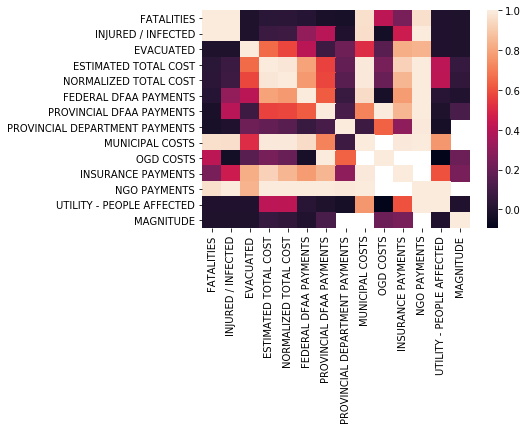

In [6]:
sns.heatmap(corr)

In [71]:
high_corr = cdd_data['MUNICIPAL COSTS'].corr(cdd_data['INJURED / INFECTED'])
null_corr = cdd_data['FATALITIES'].corr(cdd_data['FEDERAL DFAA PAYMENTS'])
negative_corr = cdd_data['OGD COSTS'].corr(cdd_data['INJURED / INFECTED'])
print("High Correlation: MUNICIPAL COSTS -> INJURED / INFECTED:",high_corr)
print("This correlation makes sense because the costs will be higher when there are more injured people and or infected people. And during disasters these costs are normally picked up by the municipality")
print("\n\nCorrelation is almost zero - FATALITIES -> FEDERAL DFAA PAYMENTS:", null_corr)
print("This correlation actually doesn't make any sense. After further investigation the data corresponding to these fields is perceived as NaN so this means that we need more data to reach a conclusion on this correlation")
print("\n\nNegative Correlation OGD Costs -> INJURED / INFECTED:", negative_corr)
print("This correlation also makes sense. The OGD (Other Government Departments) costs will be negative correlated to the number of injured/infected people. This makes sense because the costs are mostly supported by the Municipality (as stated on the explanation for the high correalation)")


High Correlation: MUNICIPAL COSTS -> INJURED / INFECTED: 0.9652859446245871
This correlation makes sense because the costs will be higher when there are more injured people and or infected people. And during disasters these costs are normally picked up by the municipality


Correlation is almost zero - FATALITIES -> FEDERAL DFAA PAYMENTS: 0.014838411818153993
This correlation actually doesn't make any sense. After further investigation the data corresponding to these fields is perceived as NaN so this means that we need more data to reach a conclusion on this correlation


Negative Correlation OGD Costs -> INJURED / INFECTED: -0.03691510734525908
This correlation also makes sense. The OGD (Other Government Departments) costs will be negative correlated to the number of injured/infected people. This makes sense because the costs are mostly supported by the Municipality (as stated on the explanation for the high correalation)


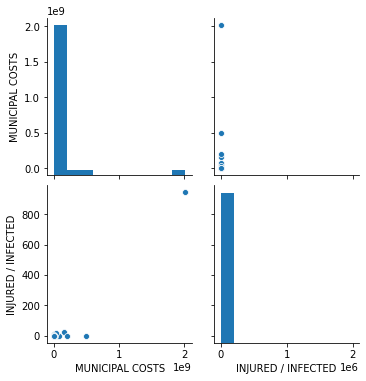

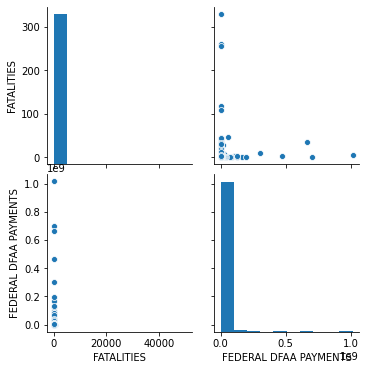

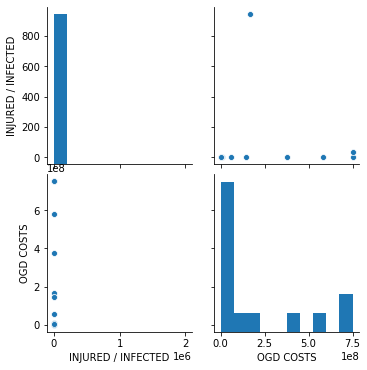

In [79]:
#Pairplot documentation -> https://seaborn.pydata.org/generated/seaborn.pairplot.html

g = sns.pairplot(cdd_data, vars=["MUNICIPAL COSTS", "INJURED / INFECTED"])
g = sns.pairplot(cdd_data, vars=["FATALITIES", "FEDERAL DFAA PAYMENTS"])
g = sns.pairplot(cdd_data, vars=["INJURED / INFECTED","OGD COSTS"])

Yes. All the plots make sense with the values and observations found on the previous exercise.
Although I don't find these plots the best way to visualize these correlations. I prefer the normal plots


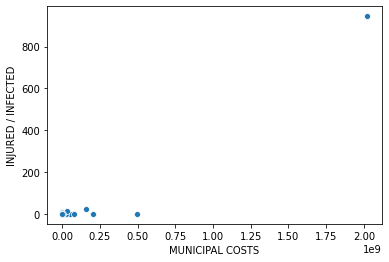

In [82]:
print("Yes. All the plots make sense with the values and observations found on the previous exercise.")
print("Although I don't find these plots the best way to visualize these correlations. I prefer the normal plots")
g = sns.scatterplot(x="MUNICIPAL COSTS", y="INJURED / INFECTED", data=cdd_data)


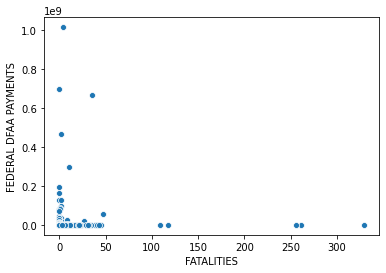

In [83]:
g = sns.scatterplot(x="FATALITIES", y = "FEDERAL DFAA PAYMENTS", data=cdd_data)

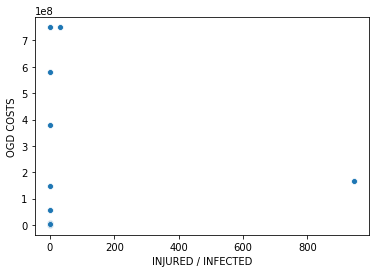

In [84]:
g = sns.scatterplot(x="INJURED / INFECTED", y="OGD COSTS", data=cdd_data)